# Dry Bean Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d sansuthi/dry-bean-dataset

Dataset URL: https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset
License(s): CC0-1.0
 99%|██████████████████████████████████████▌| 1.00M/1.01M [00:03<00:00, 267kB/s]
100%|███████████████████████████████████████| 1.01M/1.01M [00:03<00:00, 269kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Dry Bean Classification/dry-bean-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Dry Bean Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("Dry_Bean.csv")

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
df.shape

(13611, 17)

In [7]:
df.size

231387

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [10]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(68)

In [12]:
df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [13]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

## Data Visualization

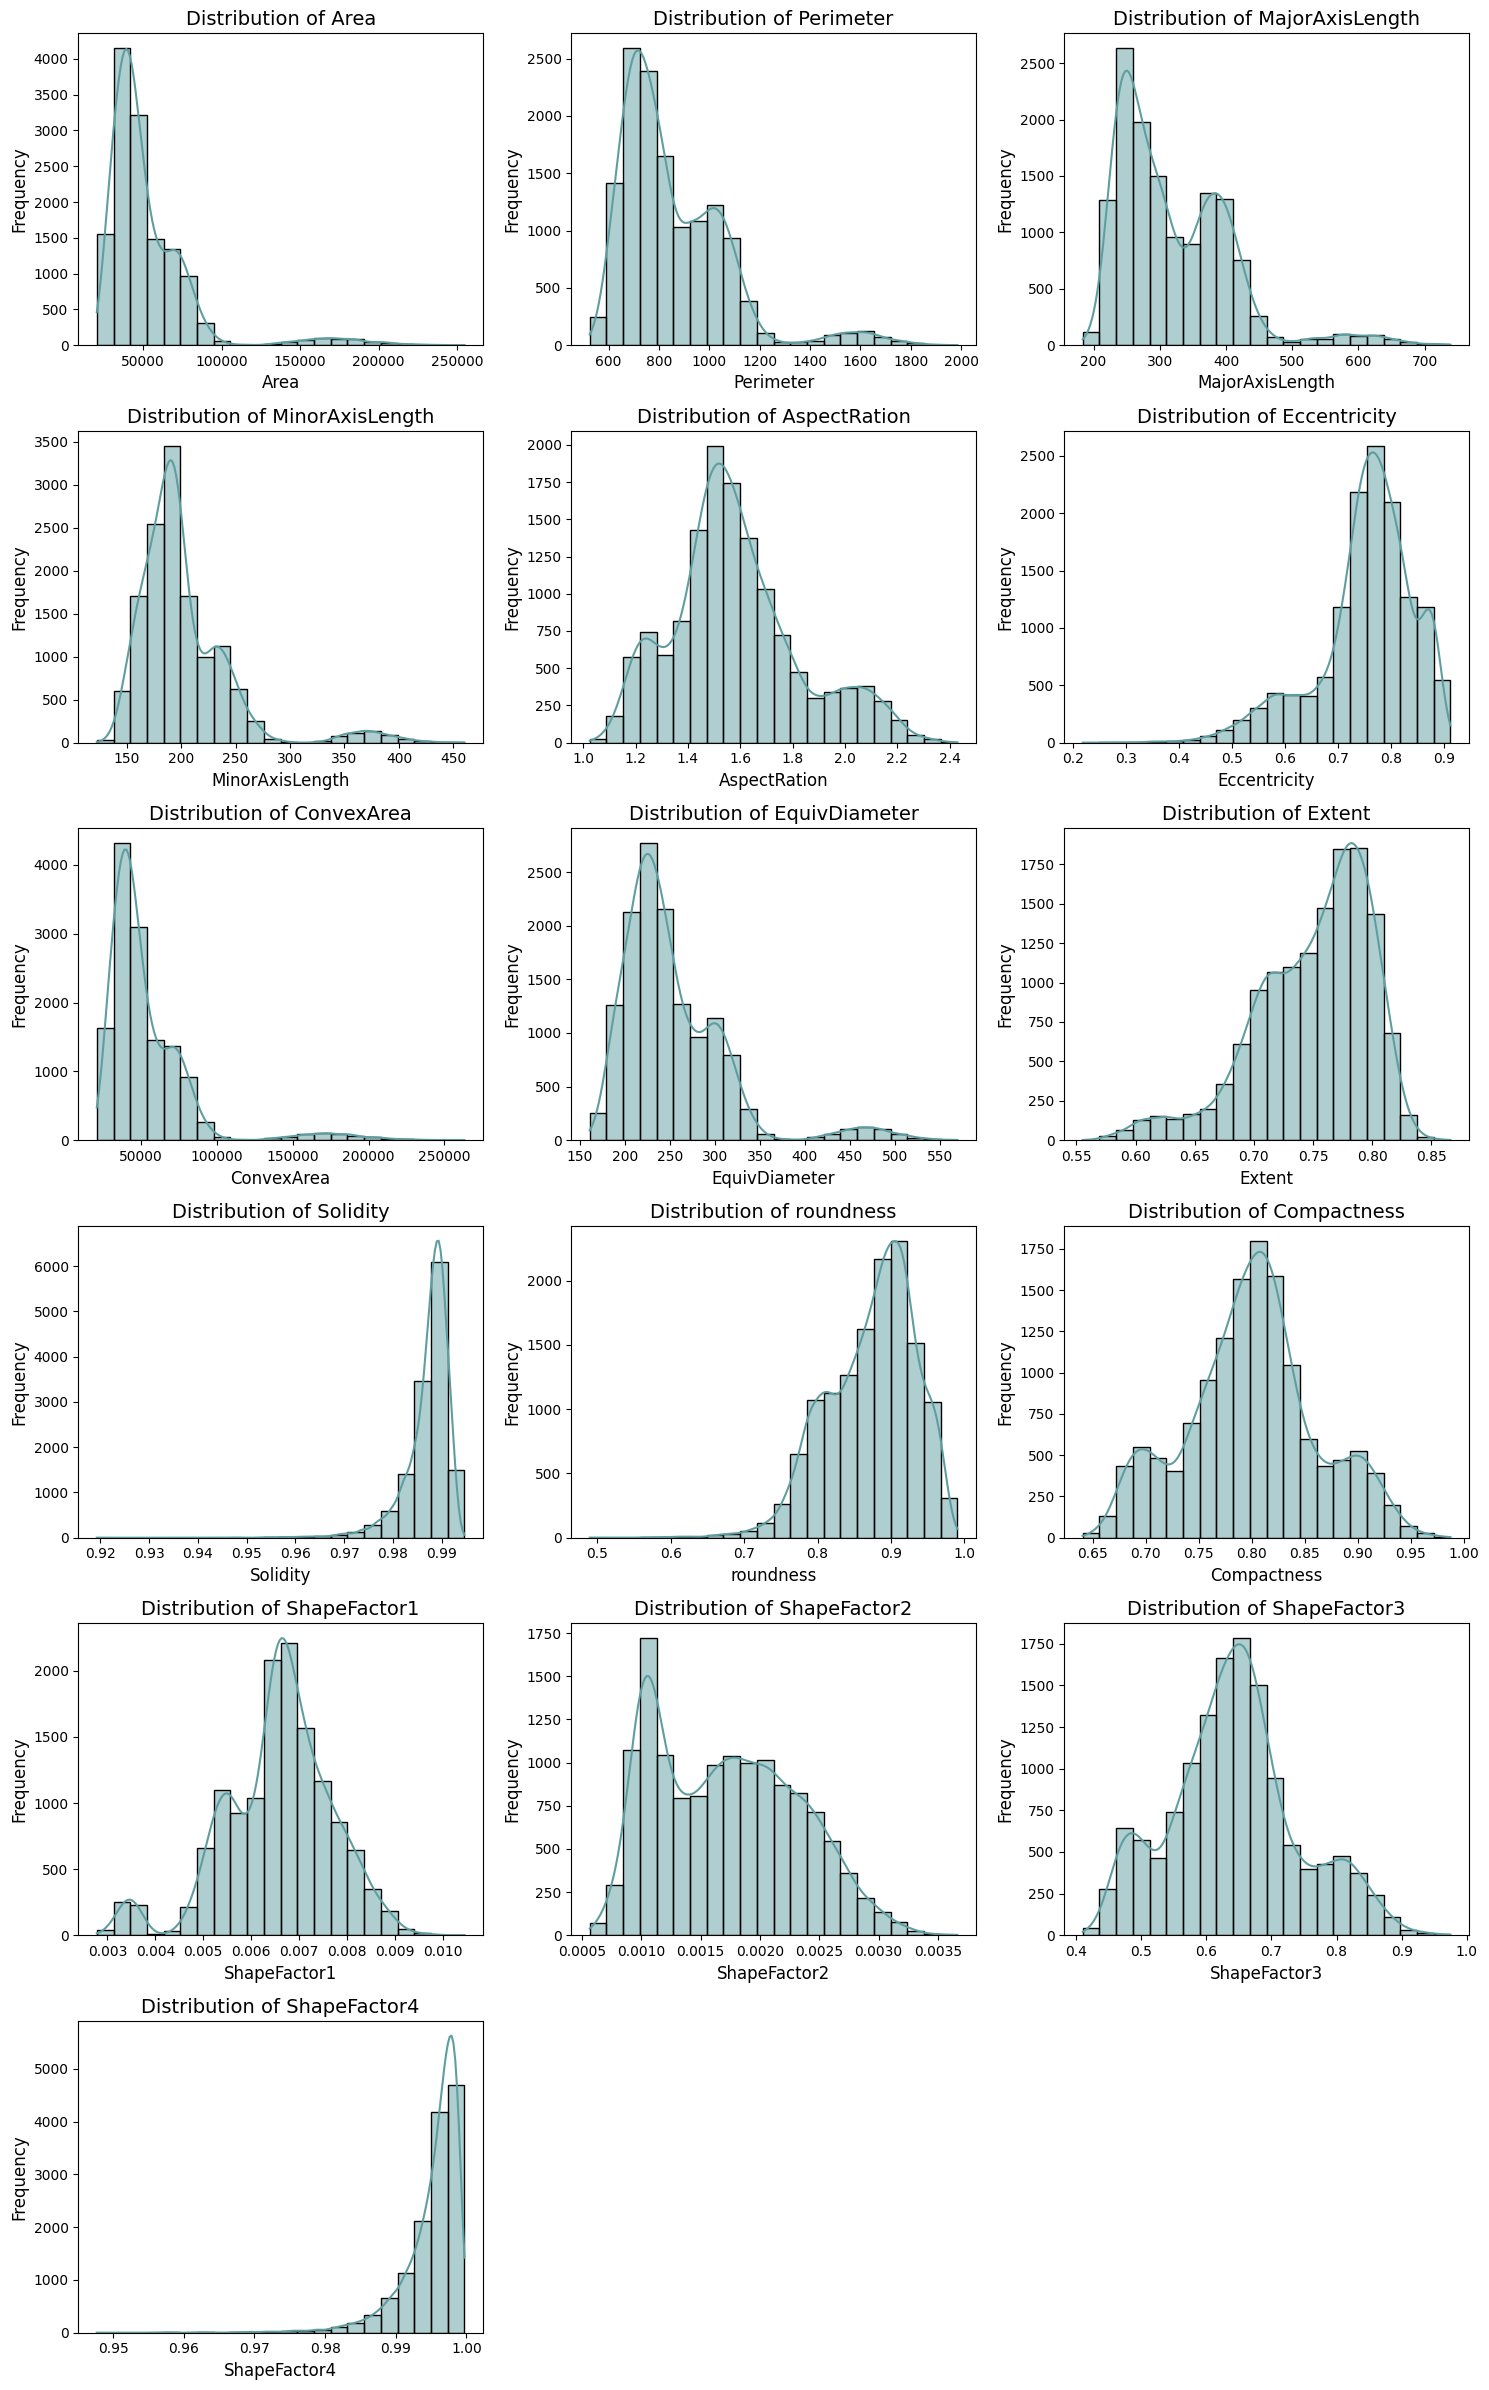

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

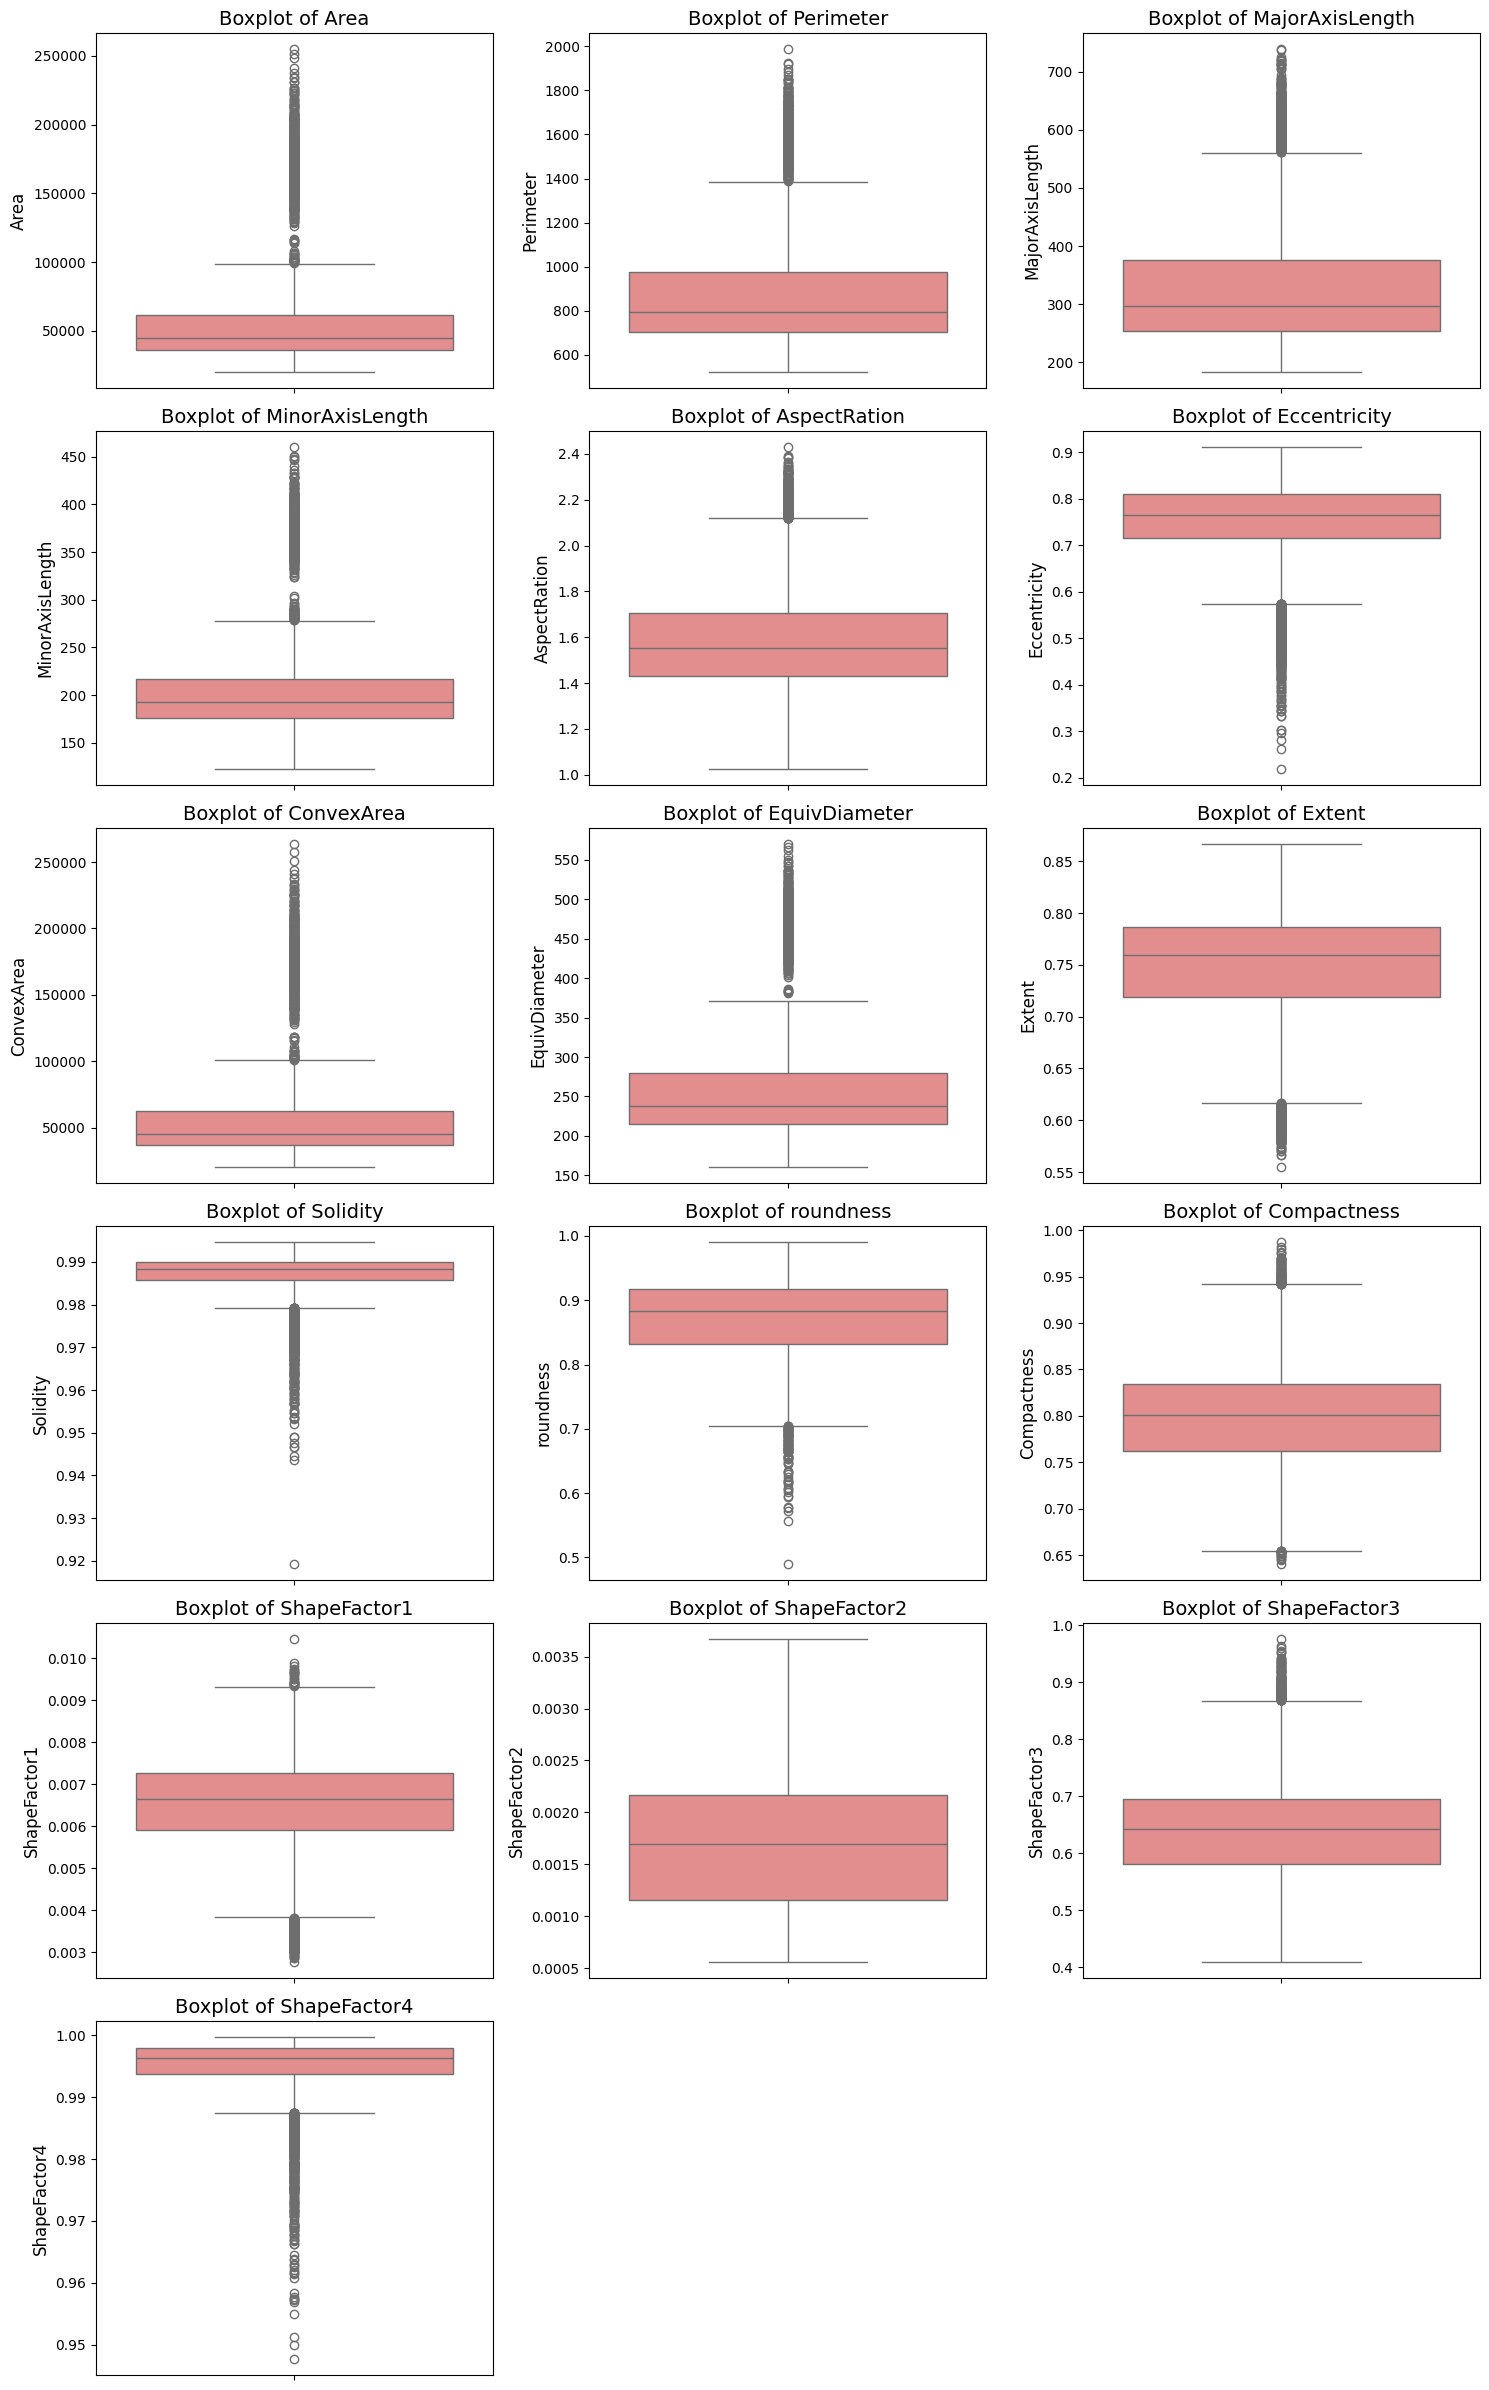

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

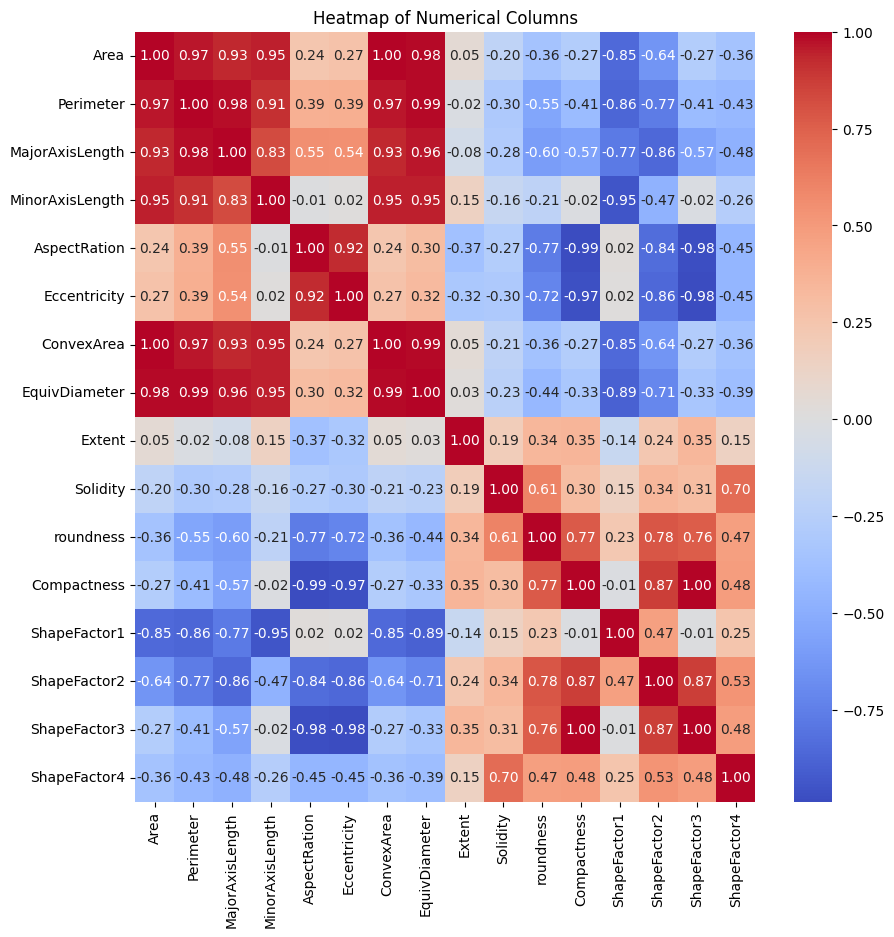

In [17]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [18]:
# Dropping Duplicates

df.drop_duplicates(inplace=True)

In [24]:
# Compute the correlation matrix for numerical columns only
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set the correlation threshold
threshold = 0.8

# Identify columns to drop
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the highly correlated numerical columns
df_reduced = df.drop(columns=columns_to_drop)

# Print the columns that were removed
print(f"Columns removed due to high correlation: {columns_to_drop}")

Columns removed due to high correlation: {'ConvexArea', 'Compactness', 'MajorAxisLength', 'ShapeFactor1', 'ShapeFactor3', 'EquivDiameter', 'MinorAxisLength', 'ShapeFactor2', 'Perimeter', 'Eccentricity'}


In [25]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [27]:
X = df.drop(columns=['Class'])
y = df['Class']

In [28]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [29]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [31]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.923218899963086, 0.8028792912513842, 0.929125138427464, 0.9254337393872277, 0.7910668143226283, 0.9224806201550387, 0.9195275009228497, 0.8944259874492433, 0.9294942783314877]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       259
           1       1.00      1.00      1.00       114
           2       0.92      0.96      0.94       305
           3       0.93      0.91      0.92       707
           4       0.95      0.95      0.95       376
           5       0.95      0.94      0.94       414
           6       0.86      0.87      0.87       534

    accuracy                           0.92      2709
   macro avg       0.93      0.94      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Confusion Matrix:
 [[237   0  15   0   0   1   6]
 [  0 114   0   0   0   0   0]
 [  9   0 292   0   1   1   2]
 [  0   0   0 646   1  12  48]
 [  2   0   7   4 358   0   5]
 [  6   0   0   7   0 388  13]
 [  1   0   3  40  16   8 466]]


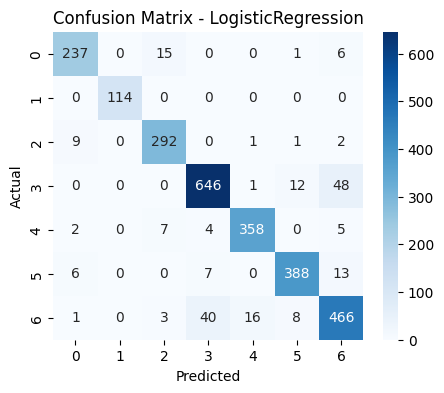

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       259
           1       1.00      0.95      0.97       114
           2       0.72      0.95      0.82       305
           3       0.77      0.97      0.86       707
           4       0.82      0.89      0.85       376
           5       0.81      0.91      0.86       414
           6       0.87      0.30      0.45       534

    accuracy                           0.80      2709
   macro avg       0.84      0.83      0.81      2709
weighted avg       0.82      0.80      0.78      2709

Confusion Matrix:
 [[220   0  26   0   0   8   5]
 [  1 108   4   0   0   0   1]
 [  4   0 291   0   5   5   0]
 [  0   0   0 687   4   7   9]
 [  1   0  20  11 333   1  10]
 [ 16   0   0  21   2 375   0]
 [ 12   0  62 171  61  67 161]]


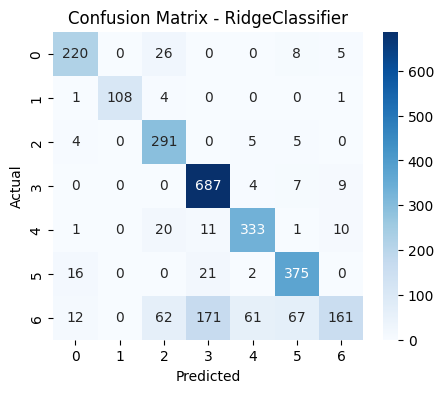

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93       259
           1       1.00      1.00      1.00       114
           2       0.94      0.97      0.95       305
           3       0.91      0.93      0.92       707
           4       0.97      0.96      0.96       376
           5       0.96      0.94      0.95       414
           6       0.88      0.87      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

Confusion Matrix:
 [[236   0  15   0   0   1   7]
 [  0 114   0   0   0   0   0]
 [  5   0 295   0   2   1   2]
 [  0   0   0 655   0  10  42]
 [  3   0   4   5 360   0   4]
 [  5   0   0   8   0 391  10]
 [  1   0   0  51  10   6 466]]


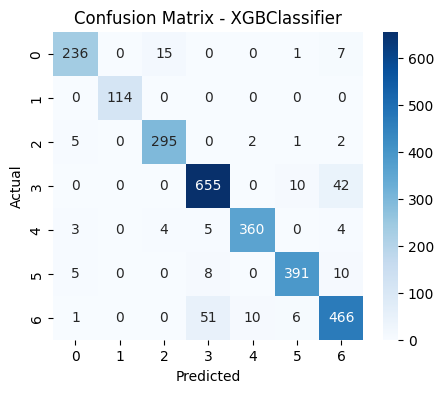

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       259
           1       1.00      1.00      1.00       114
           2       0.92      0.96      0.94       305
           3       0.90      0.93      0.91       707
           4       0.96      0.95      0.96       376
           5       0.94      0.93      0.94       414
           6       0.88      0.87      0.88       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Confusion Matrix:
 [[230   0  20   0   1   1   7]
 [  0 114   0   0   0   0   0]
 [  9   0 292   0   1   1   2]
 [  0   0   0 654   0  16  37]
 [  3   0   5   4 357   0   7]
 [  3   0   0  15   0 387   9]
 [  1   0   1  50  11   7 464]]


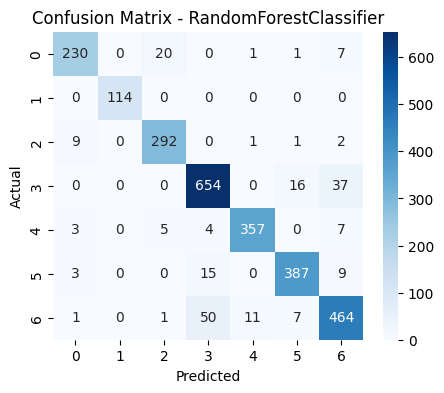

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69       259
           1       0.00      0.00      0.00       114
           2       0.50      0.53      0.51       305
           3       0.92      0.83      0.87       707
           4       0.92      0.89      0.91       376
           5       0.84      0.94      0.89       414
           6       0.80      0.87      0.83       534

    accuracy                           0.79      2709
   macro avg       0.66      0.69      0.67      2709
weighted avg       0.77      0.79      0.78      2709

Confusion Matrix:
 [[206   0  39   0   3   2   9]
 [  0   0 114   0   0   0   0]
 [125   0 162   0  16   1   1]
 [  0   0   0 585   2  56  64]
 [  1   0   4   4 334   1  32]
 [  4   0   2   6   0 390  12]
 [  2   0   4  39   7  16 466]]


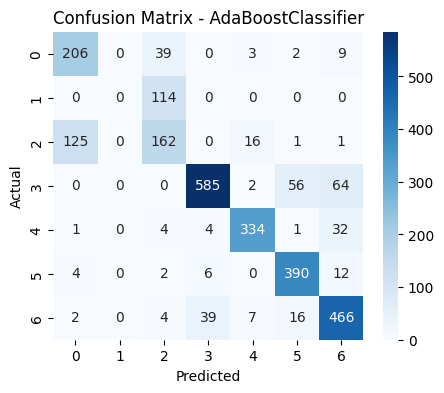

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       259
           1       1.00      1.00      1.00       114
           2       0.93      0.96      0.94       305
           3       0.91      0.92      0.91       707
           4       0.96      0.95      0.95       376
           5       0.95      0.93      0.94       414
           6       0.87      0.87      0.87       534

    accuracy                           0.92      2709
   macro avg       0.94      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Confusion Matrix:
 [[233   0  17   0   1   1   7]
 [  0 114   0   0   0   0   0]
 [  8   0 292   0   1   2   2]
 [  0   0   0 651   2   9  45]
 [  2   0   5   5 356   0   8]
 [  6   0   0  12   0 387   9]
 [  2   0   0  48  12   7 465]]


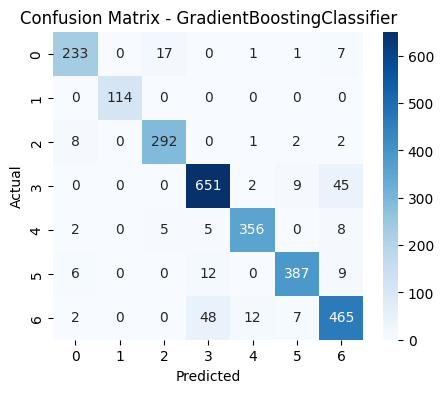

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       259
           1       1.00      1.00      1.00       114
           2       0.92      0.94      0.93       305
           3       0.89      0.92      0.91       707
           4       0.96      0.94      0.95       376
           5       0.93      0.92      0.93       414
           6       0.88      0.86      0.87       534

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Confusion Matrix:
 [[236   0  15   0   1   1   6]
 [  0 114   0   0   0   0   0]
 [ 13   0 287   0   3   1   1]
 [  0   0   0 649   1  16  41]
 [  3   0   8   5 355   0   5]
 [  5   0   0  20   0 381   8]
 [  1   0   2  52  11   9 459]]


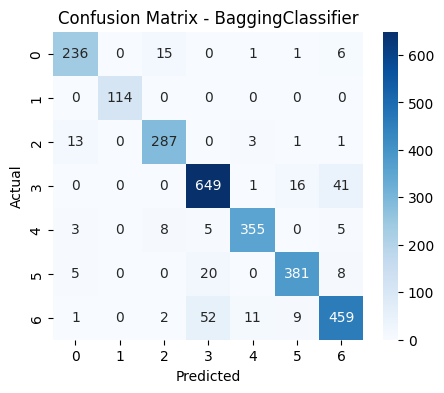

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       259
           1       0.99      1.00      1.00       114
           2       0.90      0.92      0.91       305
           3       0.90      0.88      0.89       707
           4       0.94      0.94      0.94       376
           5       0.90      0.91      0.91       414
           6       0.82      0.83      0.83       534

    accuracy                           0.89      2709
   macro avg       0.90      0.91      0.91      2709
weighted avg       0.89      0.89      0.89      2709

Confusion Matrix:
 [[228   1  17   0   1   3   9]
 [  0 114   0   0   0   0   0]
 [ 17   0 280   0   4   1   3]
 [  0   0   0 621   5  21  60]
 [  3   0   7   2 353   0  11]
 [  5   0   1  19   0 377  12]
 [  7   0   6  48  14  15 444]]


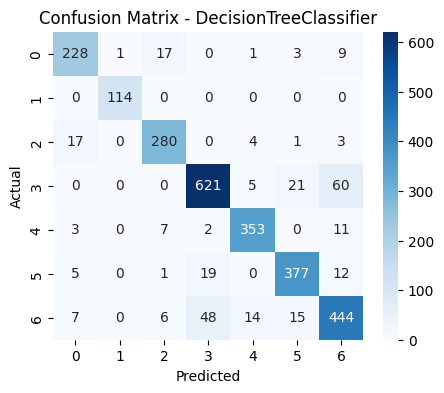

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       259
           1       0.99      1.00      1.00       114
           2       0.94      0.95      0.94       305
           3       0.92      0.93      0.92       707
           4       0.96      0.95      0.96       376
           5       0.95      0.95      0.95       414
           6       0.88      0.88      0.88       534

    accuracy                           0.93      2709
   macro avg       0.94      0.94      0.94      2709
weighted avg       0.93      0.93      0.93      2709

Confusion Matrix:
 [[238   0  14   0   0   1   6]
 [  0 114   0   0   0   0   0]
 [  8   1 291   0   1   1   3]
 [  0   0   0 654   0  13  40]
 [  2   0   6   4 359   0   5]
 [  4   0   0   8   0 393   9]
 [  1   0   0  44  14   6 469]]


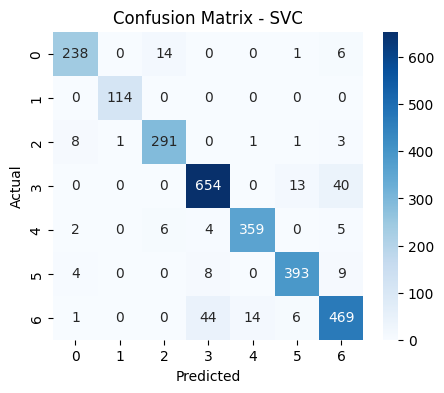

In [32]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()